Dataset analysis employee attrition
Link - https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

# Management decision problem
- Take corrective action in  order to reduce the employee attrition.

# Analytics Research Problem
- Identify the factors affecting employee attrition and convey  to management so that they
can narrow down the scope .

# Research Objective
  1. Pre-process data. 
  2. Identify Factors and run ML algorithms to predict which employee will leave the company.
  3. Visualise

In [1]:
import pandas  as pd
import numpy   as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

##read the dataset
df_emp = pd.read_csv(r"D:\github\DataScience\Kaggle\employee_attrition\emp.csv")

In [2]:
# check for column names if name change is required 
columns = df_emp.columns
print(columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [3]:
# check for null values in any column
df_emp.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# EDA  and Transformation -  Attrition

In [4]:
#Check for null values
df_emp['Attrition'].describe()


In [ ]:

lb = LabelEncoder() 
df_emp['Attrition'] = lb.fit_transform(df_emp['Attrition'])



# EDA  and Transformation - Age

In [5]:
df_emp['Age'].describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

## RO-1 Identify which age group is vulnerable for iteration 
### Result - As per the Bar chart Millennial are more likely  to leave the organisation

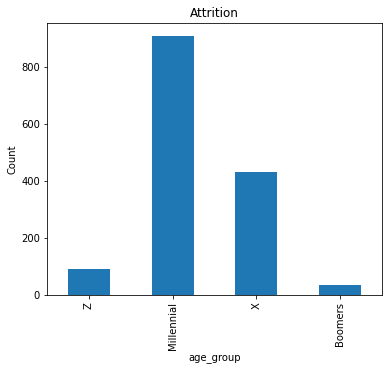

In [6]:
bins = [18, 24, 40, 56, 66]
labels = ['Z', 'Millennial', 'X', 'Boomers']
df_emp['age_group'] = pd.cut(df_emp['Age'], bins=bins, labels=labels)

dfg = df_emp.groupby(['age_group'])['Attrition'].count()

dfg.plot(kind='bar', title='Attrition', ylabel='Count',
         xlabel='age_group', figsize=(6, 5))


plt.show()

# EDA  and Transformation - BusinessTravel

In [11]:
df_emp['BusinessTravel'].describe()


count              1470
unique                3
top       Travel_Rarely
freq               1043
Name: BusinessTravel, dtype: object

In [12]:
df_emp['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [13]:
# 3 unique values of Business travel 
lb = LabelEncoder() 
df_emp['BusinessTravel'] = lb.fit_transform(df_emp['BusinessTravel'])

# EDA  and Transformation - DailyRate

In [14]:
df_emp['DailyRate'].describe()

count    1470.000000
mean      802.485714
std       403.509100
min       102.000000
25%       465.000000
50%       802.000000
75%      1157.000000
max      1499.000000
Name: DailyRate, dtype: float64

No transformation needed for DailyRate - Assumption is this daily wage rate

# EDA  and Transformation - Department

In [16]:
df_emp['Department'].describe()

count                       1470
unique                         3
top       Research & Development
freq                         961
Name: Department, dtype: object

In [17]:
df_emp['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

## RO-2 Identify which Department is vulnerable for iteration 
### Result - As per the Bar chart R&D department has maximum Attrition and Management needs attention

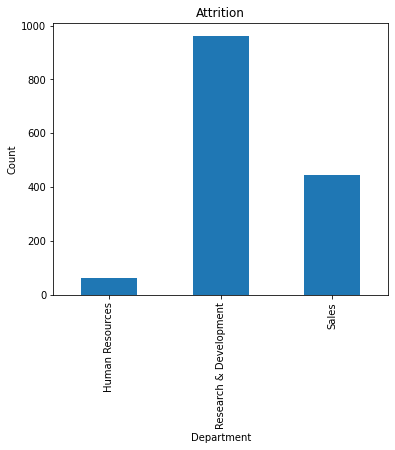

In [18]:
df_dep = df_emp.groupby(['Department'])['Attrition'].count()

df_dep.plot(kind='bar', title='Attrition', ylabel='Count',
         xlabel='Department', figsize=(6, 5))


plt.show()

For predictive modelling  Department variable can be ignored. 

# EDA  and Transformation - DistanceFromHome

In [19]:
df_emp['DistanceFromHome'].describe()

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

No further transformation needed but this variable make sense for predictive modelling since daily travel from home  to office 
is a motivational factor 

# EDA  and Transformation - Education

In [21]:
df_emp['Education'].describe()

count    1470.000000
mean        2.912925
std         1.024165
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Education, dtype: float64

In [22]:
df_emp['Education'].unique()

array([2, 1, 4, 3, 5], dtype=int64)

Education variable is already encoded in the dataset and there is no need for data transformation
Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

# EDA  and Transformation - EducationField

In [23]:
df_emp['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

Since we have education already a variable For predictive modelling  EducationField variable can be ignored. 

# EDA  and Transformation - EmployeeCount

In [24]:
df_emp['EmployeeCount'].describe()

count    1470.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: EmployeeCount, dtype: float64

In [25]:
df_emp['EmployeeCount'].unique()

array([1], dtype=int64)

Same value for every record.Seems garbage data . Can be ignored from  the predictive modelling

In [ ]:
# EDA  and Transformation - EmployeeNumber

In [26]:
df_emp['EmployeeNumber'].describe()

count    1470.000000
mean     1024.865306
std       602.024335
min         1.000000
25%       491.250000
50%      1020.500000
75%      1555.750000
max      2068.000000
Name: EmployeeNumber, dtype: float64

EmployeeNumber is identification number , this can be ignored from the predictive model

# EDA  and Transformation - EnvironmentSatisfaction

In [29]:
df_emp['EnvironmentSatisfaction'].describe()

count    1470.000000
mean        2.721769
std         1.093082
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: EnvironmentSatisfaction, dtype: float64

EnvironmentSatisfaction - No need for data transformation - GPTW variable
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

# EDA  and Transformation - Gender

In [30]:
df_emp['Gender'].describe()

count     1470
unique       2
top       Male
freq       882
Name: Gender, dtype: object

In [31]:
df_emp['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [32]:
lbs = LabelEncoder() 
df_emp['Gender'] = lbs.fit_transform(df_emp['Gender'])

# EDA  and Transformation - HourlyRate

In [33]:
df_emp['HourlyRate'].describe()

count    1470.000000
mean       65.891156
std        20.329428
min        30.000000
25%        48.000000
50%        66.000000
75%        83.750000
max       100.000000
Name: HourlyRate, dtype: float64

DailyRate and HourlyRate convey same information so either of them can be considered in the predictive modelling . 
We will drop DailyRate and consider HourlyRate for our analysis

# EDA  and Transformation - JobInvolvement

In [34]:
df_emp['JobInvolvement'].describe()

count    1470.000000
mean        2.729932
std         0.711561
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: JobInvolvement, dtype: float64

In [35]:
df_emp['JobInvolvement'].unique()

array([3, 2, 4, 1], dtype=int64)

JobInvolvement - No need for data transformation - GPTW variable
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

# EDA  and Transformation - JobLevel

In [36]:
df_emp['JobLevel'].unique()

array([2, 1, 3, 4, 5], dtype=int64)

No data transformation for JobLevel

# EDA  and Transformation - JobRole

In [37]:
df_emp['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

JobRole can be ignored from predictive modelling

# EDA  and Transformation - JobSatisfaction

In [38]:
df_emp['JobSatisfaction'].unique()

array([4, 2, 3, 1], dtype=int64)

JobSatisfaction - No need for data transformation - GPTW variable
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

# EDA  and Transformation - MaritalStatus

In [40]:
df_emp['MaritalStatus'].describe()

count        1470
unique          3
top       Married
freq          673
Name: MaritalStatus, dtype: object

In [41]:
df_emp['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [43]:
#from sklearn.preprocessing import LabelEncoder

lbms =  LabelEncoder()
df_emp['MaritalStatus'] = lbms.fit_transform(df_emp['MaritalStatus'])

# EDA  and Transformation - MonthlyIncome

In [44]:
df_emp['MonthlyIncome'].describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

DailyRate , HourlyRate and  MonthlyIncome  convey same information so either of them can be considered in the predictive modelling . 
We will drop DailyRate and MonthlyIncome and consider HourlyRate for our analysis

# EDA  and Transformation - MonthlyRate

In [45]:
df_emp['MonthlyRate'].describe()

count     1470.000000
mean     14313.103401
std       7117.786044
min       2094.000000
25%       8047.000000
50%      14235.500000
75%      20461.500000
max      26999.000000
Name: MonthlyRate, dtype: float64

DailyRate , HourlyRate ,  MonthlyIncome,MonthlyRate  convey same information so either of them can be considered in the predictive modelling . 
We will drop DailyRat , MonthlyIncome ,MonthlyRate and consider HourlyRate for our analysis
We will drop DailyRat , MonthlyIncome ,MonthlyRate and consider HourlyRate for our analysis

# EDA  and Transformation - NumCompaniesWorked

In [46]:
df_emp['NumCompaniesWorked'].describe()

count    1470.000000
mean        2.693197
std         2.498009
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: NumCompaniesWorked, dtype: float64

NumCompaniesWorked - variables make sense since this can be a indicator of a job hopper

# EDA  and Transformation - Over18

In [47]:
df_emp['Over18'].describe()

count     1470
unique       1
top          Y
freq      1470
Name: Over18, dtype: object

Over18- This variable make no sense as we have Age already factored in. Can be dropped from predictive modelling

# EDA  and Transformation - OverTime

In [48]:
df_emp['OverTime'].describe()

count     1470
unique       2
top         No
freq      1054
Name: OverTime, dtype: object

In [49]:
lbo = LabelEncoder()
df_emp['OverTime'] = lbo.fit_transform(df_emp['OverTime'])

# EDA  and Transformation - PercentSalaryHike

In [50]:
df_emp['PercentSalaryHike'].describe()

count    1470.000000
mean       15.209524
std         3.659938
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

# EDA  and Transformation - PerformanceRating

In [51]:
df_emp['PerformanceRating'].describe()

count    1470.000000
mean        3.153741
std         0.360824
min         3.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: PerformanceRating, dtype: float64

In [52]:
df_emp['PerformanceRating'].unique()

array([3, 4], dtype=int64)

PerformanceRating - No need for data transformation
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

# EDA  and Transformation - RelationshipSatisfaction

In [53]:
df_emp['RelationshipSatisfaction'].unique()

array([1, 4, 2, 3], dtype=int64)

RelationshipSatisfaction - No need for data transformation - GPTW variable
1 'Low'
2 'Medium'
3 'High'
4 'Very High

# EDA  and Transformation - StandardHours

In [54]:
df_emp['StandardHours'].describe()

count    1470.0
mean       80.0
std         0.0
min        80.0
25%        80.0
50%        80.0
75%        80.0
max        80.0
Name: StandardHours, dtype: float64

Same value - garbage data StandardHours can be ignored for predictive modelling

# EDA  and Transformation - StockOptionLevel

In [55]:
df_emp['StockOptionLevel'].describe()

count    1470.000000
mean        0.793878
std         0.852077
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: StockOptionLevel, dtype: float64

In [56]:
df_emp['StockOptionLevel'].unique()

array([0, 1, 3, 2], dtype=int64)

# EDA  and Transformation - TotalWorkingYears

In [57]:
df_emp['TotalWorkingYears'].describe()

count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

# EDA  and Transformation - TrainingTimesLastYear

In [58]:
df_emp['TrainingTimesLastYear'].describe()

count    1470.000000
mean        2.799320
std         1.289271
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: TrainingTimesLastYear, dtype: float64

In [59]:
df_emp['TrainingTimesLastYear'].unique()

array([0, 3, 2, 5, 1, 4, 6], dtype=int64)

# EDA  and Transformation - WorkLifeBalance

In [60]:
df_emp['TrainingTimesLastYear'].unique()

array([0, 3, 2, 5, 1, 4, 6], dtype=int64)

WorkLifeBalance - No need for data transformation - GPTW variable
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

# EDA  and Transformation - YearsAtCompany

In [61]:
df_emp['YearsAtCompany'].describe()

count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

In [62]:
df_emp['YearsAtCompany'].unique()

array([ 6, 10,  0,  8,  2,  7,  1,  9,  5,  4, 25,  3, 12, 14, 22, 15, 27,
       21, 17, 11, 13, 37, 16, 20, 40, 24, 33, 19, 36, 18, 29, 31, 32, 34,
       26, 30, 23], dtype=int64)

YearsAtCompany - is an important variable  as it is an indicator of stable employee who stays in organization

# EDA  and Transformation - YearsInCurrentRole

In [64]:
df_emp['YearsInCurrentRole'].describe()

count    1470.000000
mean        4.229252
std         3.623137
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        18.000000
Name: YearsInCurrentRole, dtype: float64

In [65]:
df_emp['YearsInCurrentRole'].unique()

array([ 4,  7,  0,  2,  5,  9,  8,  3,  6, 13,  1, 15, 14, 16, 11, 10, 12,
       18, 17], dtype=int64)

YearsInCurrentRole - important variable as may be an indicator of no job change or growth leading  to Attrition in some cases

# EDA  and Transformation - YearsSinceLastPromotion

In [67]:
df_emp['YearsSinceLastPromotion'].describe()

count    1470.000000
mean        2.187755
std         3.222430
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        15.000000
Name: YearsSinceLastPromotion, dtype: float64

In [68]:
df_emp['YearsSinceLastPromotion'].unique()

array([ 0,  1,  3,  2,  7,  4,  8,  6,  5, 15,  9, 13, 12, 10, 11, 14],
      dtype=int64)

YearsSinceLastPromotion - indicator of growth progress

# EDA  and Transformation - YearsWithCurrManager

In [71]:
df_emp['YearsWithCurrManager'].describe()

count    1470.000000
mean        4.123129
std         3.568136
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: YearsWithCurrManager, dtype: float64

In [72]:
df_emp['YearsWithCurrManager'].unique()

array([ 5,  7,  0,  2,  6,  8,  3, 11, 17,  1,  4, 12,  9, 10, 15, 13, 16,
       14], dtype=int64)

YearsWithCurrManager - indicator part of same team or cartel

In [76]:
##  save data transformation in another csv
df_emp.to_csv(r"D:\github\DataScience\Kaggle\employee_attrition\emp_eda_transform.csv",index=False)